In [1]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rasterio.mask import mask
from constants import PROJECT_PATH


 define a function to crop and mask a raster using the property limits raster:

In [3]:
def crop_and_mask_raster(src_raster_path, property_raster_path, output_raster_path, max_height, max_width):
    with rasterio.open(src_raster_path) as src:
        # Read the source raster
        src_data = src.read(1)
        
        with rasterio.open(property_raster_path) as property_raster:
            # Read the property limits raster
            property_data = property_raster.read(1)

   

            # Pad both the source data and property data to the maximum dimensions
            src_data = np.pad(src_data, ((0, max_height - src_data.shape[0]), (0, max_width - src_data.shape[1])), constant_values=0)
            property_data = np.pad(property_data, ((0, max_height - property_data.shape[0]), (0, max_width - property_data.shape[1])), constant_values=0)

            # Create a mask using the padded property limits raster, where zero values are considered as nodata
            mask_data = (property_data != 0)

            # Check if the nodata value is set for the source raster, otherwise use a default value
            nodata_value = src.nodata if src.nodata is not None else -1
            print("Before masking:")
            print("Source data shape:", src_data.shape)
            print("Property data shape:", property_data.shape)
            print("Mask data shape:", mask_data.shape)

            # Apply the mask to the source raster
            src_data_masked = np.where(mask_data, src_data, nodata_value)
            print("After masking:")
            print("Source data masked shape:", src_data_masked.shape)

 
             # Save the masked raster
            profile = src.profile
            profile['height'] = max_height
            profile['width'] = max_width
            profile['nodata'] = nodata_value
            profile['dtype'] = 'int16'
            with rasterio.open(output_raster_path, 'w', **profile) as dst:
                dst.write(src_data_masked.astype(profile['dtype']), 1)


In [10]:
#inputs
#property_limits_raster = '/Users/romero61/github/PYFOREST-ML/src/data_loading/outputs/using_limit_raster/put_id_raster.tif'
grupo_raster = '/Users/romero61/github/PYFOREST-ML/src/data_loading/outputs/using_limits_raster/grupo_raster.tif'
deforestation_11_raster = '/Users/romero61/../../capstone/pyforest/ml_data/hansen/deforestation_by_year/deforestation_11.tif'
treecover2000_raster = '/Users/romero61/../../capstone/pyforest/ml_data/hansen/clipped_treecover2000.tif'

# outputs
output_dir = os.path.join(PROJECT_PATH,'data_loading/outputs/using_grupo_raster')
grupo_masked_raster = os.path.join(output_dir, 'grupo_masked_raster.tif')
deforestation_11_masked_raster = os.path.join(output_dir,'deforestation_11_masked_raster.tif')
treecover2000_masked_raster = os.path.join(output_dir,'treecover2000_masked_raster.tif')


In [8]:
# Read the data from the masked rasters
with rasterio.open(grupo_raster) as src:
    grupo_data = src.read(1)
with rasterio.open(deforestation_11_raster) as src:
    deforestation_11_data = src.read(1)
with rasterio.open(treecover2000_raster) as src:
    treecover2000_data = src.read(1)

In [9]:
 # Determine the maximum dimensions of all rasters
max_height = max(grupo_data.shape[0], deforestation_11_data.shape[0], treecover2000_data.shape[0])
max_width = max(grupo_data.shape[1], deforestation_11_data.shape[1], treecover2000_data.shape[1])


In [11]:
crop_and_mask_raster(grupo_raster, grupo_raster, grupo_masked_raster, max_height, max_width)
crop_and_mask_raster(deforestation_11_raster, grupo_raster, deforestation_11_masked_raster, max_height, max_width)
crop_and_mask_raster(treecover2000_raster, grupo_raster, treecover2000_masked_raster, max_height, max_width)


Before masking:
Source data shape: (22512, 20381)
Property data shape: (22512, 20381)
Mask data shape: (22512, 20381)
After masking:
Source data masked shape: (22512, 20381)
Before masking:
Source data shape: (22512, 20381)
Property data shape: (22512, 20381)
Mask data shape: (22512, 20381)
After masking:
Source data masked shape: (22512, 20381)
Before masking:
Source data shape: (22512, 20381)
Property data shape: (22512, 20381)
Mask data shape: (22512, 20381)
After masking:
Source data masked shape: (22512, 20381)


In [12]:
# Read the data from the masked rasters
with rasterio.open(grupo_masked_raster) as src:
    grupo_data = src.read(1)
with rasterio.open(deforestation_11_masked_raster) as src:
    deforestation_11_data = src.read(1)
with rasterio.open(treecover2000_masked_raster) as src:
    treecover2000_data = src.read(1)

Grupo raster shape: (22512, 20381)
Deforestation 11 raster shape: (22512, 20381)
Treecover 2000 raster shape: (22512, 20381)


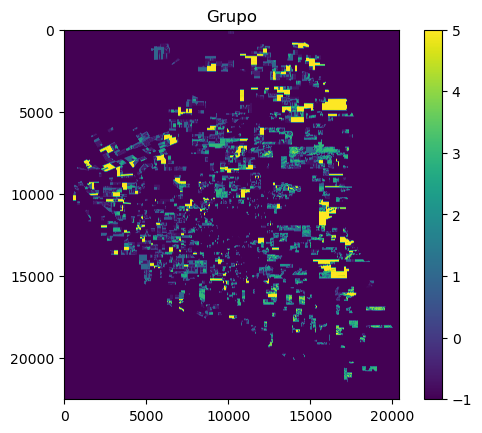

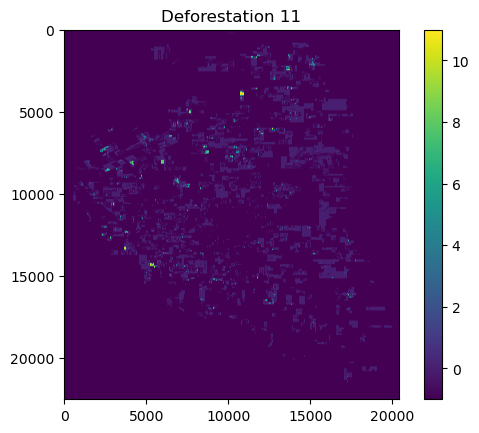

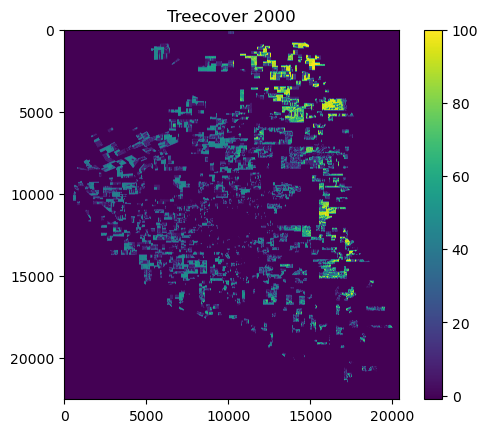

In [13]:
def plot_raster(data, title):
    plt.imshow(data)
    plt.colorbar()
    plt.title(title)
    plt.show()

print("Grupo raster shape:", grupo_data.shape)
print("Deforestation 11 raster shape:", deforestation_11_data.shape)
print("Treecover 2000 raster shape:", treecover2000_data.shape)

plot_raster(grupo_data, "Grupo")
plot_raster(deforestation_11_data, "Deforestation 11")
plot_raster(treecover2000_data, "Treecover 2000")

In [14]:
# Stack the rasters together
stacked_rasters = np.stack([grupo_data, deforestation_11_data, treecover2000_data], axis=-1)

# Flatten the 3D array into a 2D array
flattened_array = stacked_rasters.reshape(-1, stacked_rasters.shape[2])

# Remove rows with NoData values
no_data_value = -1  # Replace this with the NoData value used in your rasters

# Create a boolean mask to filter out rows containing NoData values
valid_rows_mask = np.all(flattened_array != no_data_value, axis=1)

# Apply the mask to the flattened array to keep only the valid rows
filtered_array = flattened_array[valid_rows_mask]


In [16]:
filtered_array

array([[  1,   0, 100],
       [  1,   0,  99],
       [  1,   0,  99],
       ...,
       [  1,   0,  64],
       [  1,   0,   0],
       [  1,   0,  71]], dtype=int16)

In [ ]:
# Save the filtered array as a CSV file
filtered_df = pd.DataFrame(filtered_array, columns=['land_use_plan', 'deforestation_11', 'treecover2000'])
filtered_df.to_csv('~/github/PYFOREST-ML/src/data_loading/outputs/using_grupo_raster/filtered_data.csv', index=False)